# 연습문제 

In [11]:
from pandas import read_excel
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sb
import sys
import os

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import pearson_r

### 데이터 가져오기

수분함유량에 따른 강도 조사 데이터

In [12]:
df = read_excel("https://data.hossam.kr/E04/beans.xlsx")
df

,수분함유량,강도
0,36,29
1,40,32
2,34,29
3,44,40
4,33,31
5,36,29
6,40,34
7,33,30
8,26,25
9,36,31


## #02. 탐색적 데이터 분석

### 산점도 그래프

In [13]:
plt.rcParams['font.family'] = "Malgun Gothic"
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['axes.unicode_minus'] = False

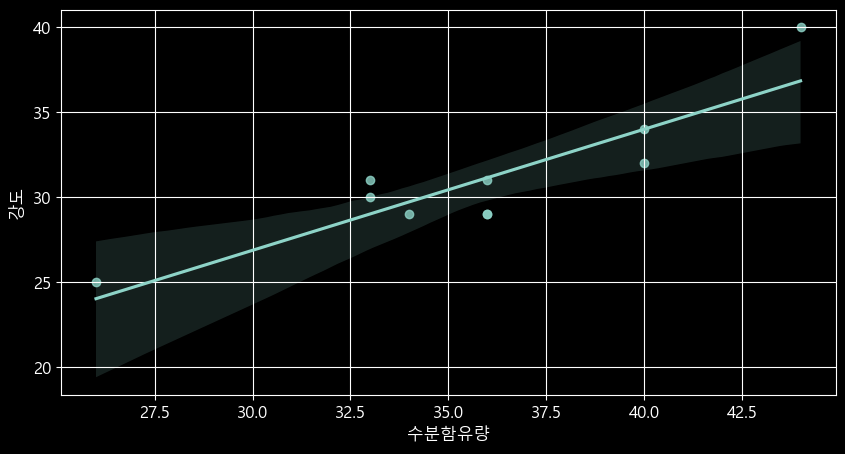

In [14]:
plt.rcParams['figure.figsize'] = (10, 5)
sb.regplot(data=df, x='수분함유량', y='강도')
plt.grid()
plt.show()
plt.close()

## #03. 추론통계

### 1) 상관분석

In [15]:
pearson_r(df)

,statistic,pvalue,result
fields,,,
수분함유량 vs 강도,0.888052,0.000599,True
강도 vs 수분함유량,0.888052,0.000599,True


> 상관분석 결과 p-value가 0.05보다 작으므로 강도와 수분함유량 간의 양의 상관관계가 통계적으로 유의함을 할 수 있다.

### 2) 회귀분석

$y = ax + b$ 에 따라 `종속 ~ 독립` 형태로 표현식을 구성한다.

#### 분석을 위한 학습모델 구성

In [16]:
model = ols("강도 ~ 수분함유량", data=df)
model

#### 분석 수행

In [17]:
fit = model.fit()
fit

#### 분석결과 확인

In [18]:
fit.summary()

# df가 아니라 table 이라고 하는 표다. 

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     강도   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     29.85
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           0.000599
Time:                        16:59:58   Log-Likelihood:                -19.614
No. Observations:                  10   AIC:                             43.23
Df Residuals:                       8   BIC:                             43.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4991      4.707      1.168      0.276      -5.355      16.353
수분함유량          0.7123      0.130      5.463      0.001       0.412       1.013
==============================================================================
Omnibus:                        0.502   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.778   Jarque-Bera (JB):                0.530
Skew:                           0.264   Prob(JB):                        0.767
Kurtosis:                       2.004   Cond. No.                         280.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 분석결과 해석

![result](res/result-all.png)

#### 모형적합도 해석

모형이 데이터에 잘 맞는 정도를 보여주는 지표

```plain
Adj. R-squared:	0.762
F-statistic:	29.85
Prob (F-statistic):	0.000599
Log-Likelihood:	-19.614
AIC:	43.23
BIC:	43.83
```

##### R-squared (R제곱, 결정계수)

모형의 설명력을 의미

> 강도 ~ 수분함유량 약 65% 설명한다. (각 사례마다 강도에 차이가 있다.)

##### Adj. R-squared

독립변수가 여러 개인 다중회귀분석에서 사용

독립변수의 개수와 표본의 크기를 고려하여 R-squared를 보정

서로 다른 모형을 비교할 때는 이 지표가 높은 쪽은 선택한다

##### F-statistic: 89.57, Prob(F-statistic): 0.000599

회귀모형에 대한 (통계적) 유의미성 검증 결과, 유의미함 (p < 0.05)

즉, 이 모형은 주어진 표본 뿐 아니라 모집단에서도 의미있는 모형이라 할 수 있음

##### AIC, BIC

로그 우도: 종속변수가 정규분포라고 가정했을 때의 우도 

로그우도를 독립변수의 수로 보정한 값 (작을 수록 좋다)

#### 회귀계수(coef) 해석

```plain
                 coef (...생략...)   P>|t|
-------------------------------------------
Intercept      5.4991 (...생략...)   0.276
speed          0.7123 (...생략...)   0.001
```


데이터로부터 얻은 계수의 추정치

절편(Intercept)의 추정치는 5.4991로, 수분함유량이 0일 때 강도의 값

강도의 계수 추정치는 0.7123로 수분함유량이 1 증가할 때마다 강도가 0.7123 증가한다는 것을 의미

##### 이를 수식으로 정리

$강도 = 5.4991 + 0.712 $

##### p값

모집단에서 계수가 0일 때, 현재와 같은 크기의 표본에서 이러한 계수가 추정될 확률

이 확률이 매우 작다는 것은, 모집단에서 수분함융량의 계수가 정확히 0.7123는 아니더라도 현재의 표본과 비슷하게 0보다 큰 어떤 범위에 있을 가능성이 높다는 것을 의미

보통 5%와 같은 유의수준을 정하여 p값이 그보다 작으면(p < 0.05), "통계적으로 유의미하다"라고 정리

> 수분함유량이 증가할 때 기대되는 강도의 변화는 유의수준 5%에서 통계적으로 유의하다.

## #04. 결과 보고

### 모형적합도 보고

F분포의 파라미터 2개와 그 때의 F값, p-value의 유의수준 비교를 명시

```
강도에 대하여 수분함유량을 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의미하였다(F(1,8) = 29.85, p < 0.05)
```

### 독립변수에 대해 보고

```
수분함유량의 회귀계수는 3.9324로, 강도에 대하여 유의미한 예측변인인 것으로 나타났다.(t(8) = 5.463, p < 0.05)
```

문제2 
아래의 데이터는 10년간 에어컨의 예약대수에 따른 실 판매대수를 조사한 가상의 데이터이다.

https://data.hossam.kr/E04/aircon.xlsx

요구사항
위 데이터를 분석하고 결과를 보고하시오.

기록적인 폭염으로 올해 에어컨 예약 대수는 150대였다. 실 판매대수를 예측하시오.

In [21]:
df1=read_excel("https://data.hossam.kr/E04/aircon.xlsx")
df1

,예약대수,판매대수
0,19,33
1,23,51
2,26,40
3,29,49
4,30,50
5,38,69
6,39,70
7,46,64
8,49,89
9,58,98


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


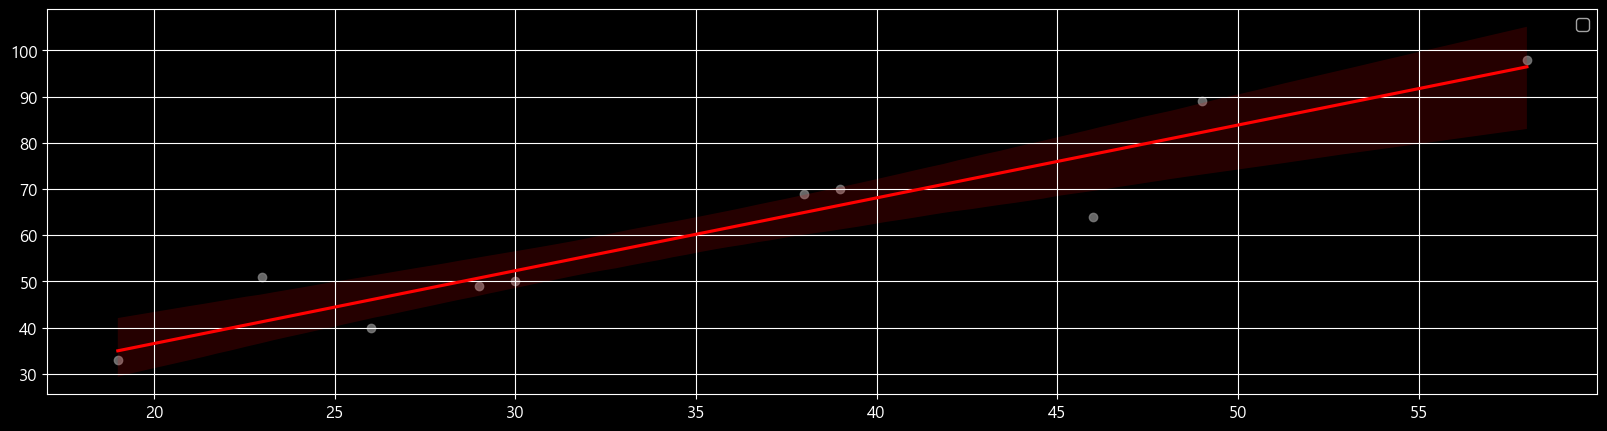

In [25]:
plt.rcParams['font.family'] = "Malgun Gothic"
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['axes.unicode_minus'] = False


sb.regplot(data=df1,x='예약대수',y='판매대수',line_kws={'color':'red'},scatter_kws={'color':'grey'})
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1,1))
plt.grid()
plt.show()
plt.close()

In [26]:
pearson_r(df1)

,statistic,pvalue,result
fields,,,
예약대수 vs 판매대수,0.946913,0.000033,True
판매대수 vs 예약대수,0.946913,0.000033,True


In [32]:
model = ols("예약대수 ~ 판매대수", data=df1)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   예약대수   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     69.40
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           3.26e-05
Time:                        17:03:51   Log-Likelihood:                -27.579
No. Observations:                  10   AIC:                             59.16
Df Residuals:                       8   BIC:                             59.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8043      4.401      0.183      0.8

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


위 데이터를 분석하고 결과를 보고하시오.

예약대수 대하여 판매대수로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의미하였다(F(1,8) = 69.40, p < 0.05)

판매대수의 회귀계수는 0.5693로, 예약대수에 대하여 유의미한 예측변인인 것으로 나타났다.(t(8) = 8.331, p < 0.05)

In [33]:
# 기록적인 폭염으로 올해 에어컨 예약 대수는 150대였다. 실 판매대수를 예측하시오.

예상판매대수 = 0.0843 + 0.5693 * 150
예상판매대수


85.47930000000001

문제 3
아래의 데이터는 부모의 키에 따른 자식의 키를 조사한 데이터이다.

https://data.hossam.kr/E04/galton.xlsx

요구사항
위 데이터를 분석하고 결과를 보고하시오.
당신이 자식을 낳는다면 키가 어느정도일지 예측해 보시오.

In [34]:
df2=read_excel("https://data.hossam.kr/E04/galton.xlsx")
df2

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0
...,...,...
923,73.7,69.5
924,73.7,69.5
925,73.7,69.5
926,73.7,69.5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


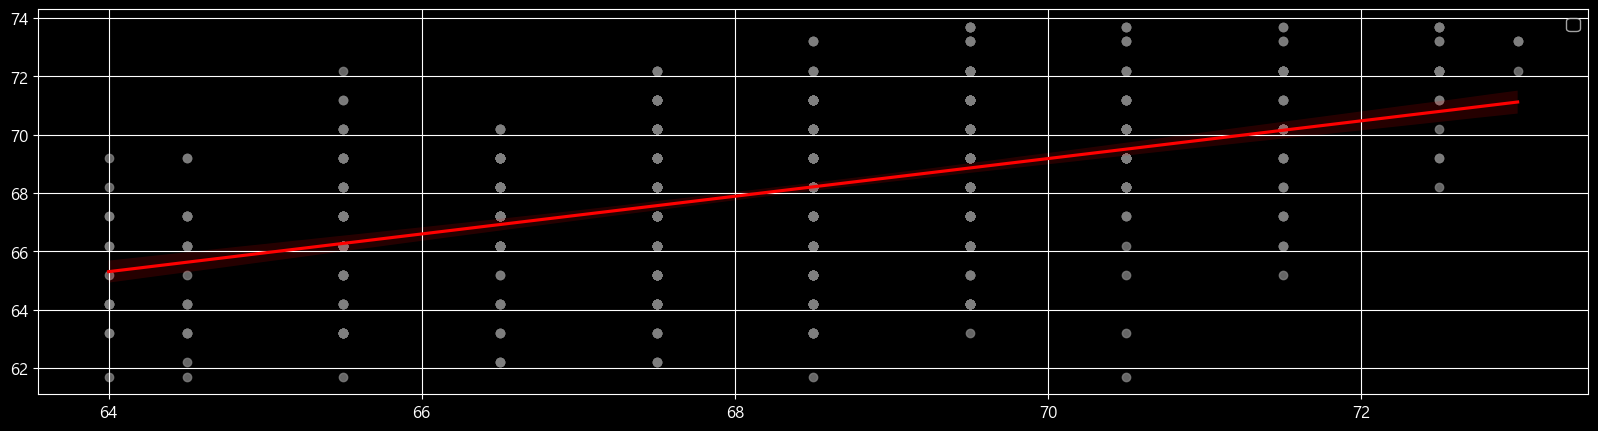

In [37]:
plt.rcParams['font.family'] = "Malgun Gothic"
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['axes.unicode_minus'] = False


sb.regplot(data=df2,x='child',y='parent',line_kws={'color':'red'},scatter_kws={'color':'grey'})
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1,1))
plt.grid()
plt.show()
plt.close()

In [38]:
pearson_r(df2)

,statistic,pvalue,result
fields,,,
child vs parent,0.458762,1.732509e-49,True
parent vs child,0.458762,1.732509e-49,True


In [39]:
model = ols("child ~ parent", data=df2)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  child   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     246.8
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           1.73e-49
Time:                        17:09:32   Log-Likelihood:                -2063.6
No. Observations:                 928   AIC:                             4131.
Df Residuals:                     926   BIC:                             4141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.9415      2.811      8.517      0.0

위 데이터를 분석하고 결과를 보고하시오.

예약대수 대하여 판매대수로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의미하였다(F(1,926) = 69.40, p < 0.05)

부모의 키 회귀계수는 246.8로, 자녀의 키에 대하여 유의미한 예측변인인 것으로 나타났다.(t(926) = 15.711, p < 0.05)


In [50]:
# 당신이 자식을 낳는다면 키가 어느정도일지 예측해 보시오.

내새끼 = 23.9415 + (0.6463 * 64.9)
내새끼 


65.88637